##### 3 lab </br>
Использование pandas для загрузки данных

In [13]:
import pandas as pd
import numpy as np

data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',')
d.head()    

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


 Добавление шапки DataFrame по умолчанию

In [14]:
data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',', header=None)
d.head() 

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Добавление шапки DataFrame с символьными именами 
столбцов

In [15]:
data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',', header=None, 
                  names=['sepal_lengthe', 'sepal_width', 'petal_lengthe', 'petal_width', 'answer'])
d.head()

,sepal_lengthe,sepal_width,petal_lengthe,petal_width,answer
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


 Добавление шапки DataFrame по умолчанию

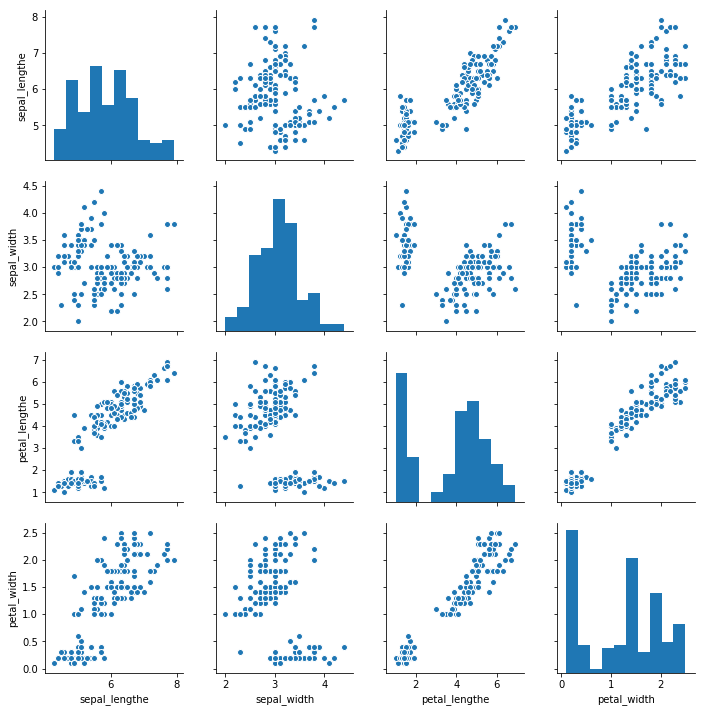

In [16]:
import seaborn as sb
%matplotlib inline
sb.pairplot(d)

 Построение графика с указанием признака отдельных 
классов

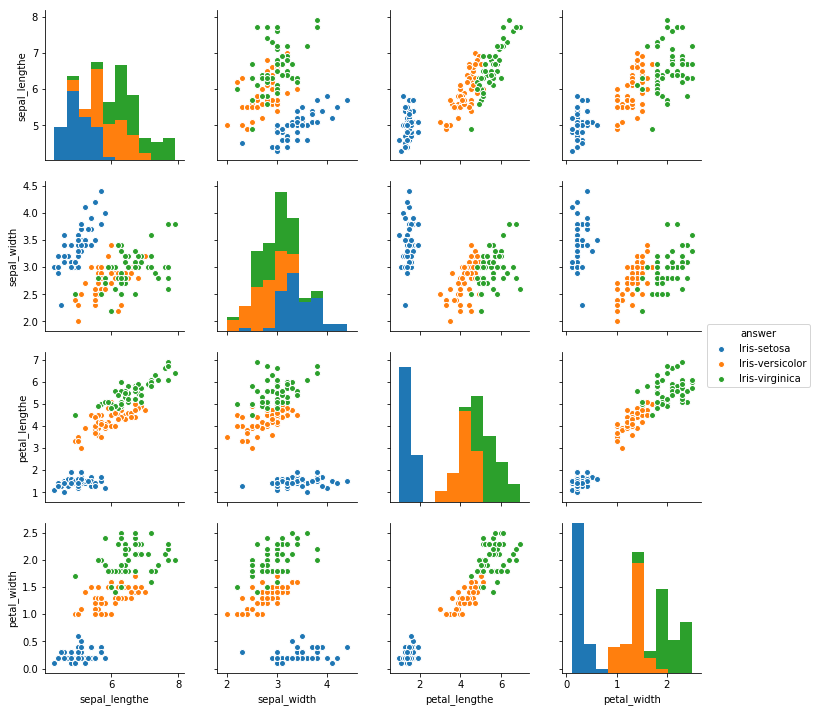

In [17]:
sb.pairplot(d, hue='answer')

Основные этапы решения задачи классификации методом 
ближайших соседей с использованием библиотеки scikit

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train = d[['sepal_lengthe', 'sepal_width', 'petal_lengthe', 'petal_width']]
y_train = d['answer']

k = 3

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)

X_test = np.array([[1.2, 1.0, 2.8, 1.2]])
target = knn.predict(X_test)

print(target)

['Iris-versicolor']


– Оценка точности классификатора с использованием 
методики hold-out


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_holdout, y_train, y_holdout = train_test_split(d[['sepal_lengthe', 'sepal_width', 'petal_lengthe', 'petal_width']],
                                                d['answer'],
                                                test_size=0.3,
                                                random_state=17)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_holdout)
accur = accuracy_score(y_holdout, knn_pred)
print("accuracy: ", accur)

accuracy:  0.977777777778


Ответы на контрольные вопросы
##### 1. Поясните особенности основных методов метрической классификации: метод ближайшего соседа, метод k ближайших соседей.
Метод ближайшего соседа - это простой алгоритм классификации, который присваивает метку класса новому экземпляру на основе метки класса его ближайшего соседа в обучающих данных. Это означает, что алгоритм просто находит учебный экземпляр, который ближе всего к новому экземпляру по некоторой метрике расстояния, и присваивает новому экземпляру метку класса этого учебного экземпляра.

Метод k-ближайших соседей является расширением метода ближайших соседей, где вместо того, чтобы просто найти ближайшего соседа, алгоритм находит k ближайших соседей нового экземпляра и присваивает метку класса на основе большинства классов этих k соседей. Значение k является гиперпараметром, который может быть настроен в зависимости от конкретной задачи.


##### 2.Поясните основные принципы и этапы реализации метода kNN.

Алгоритм k-Nearest Neighbor (kNN) - это тип обучения на основе экземпляров, когда новые данные классифицируются на основе их близости к существующим данным. Ниже приведены основные принципы и этапы реализации метода kNN:

Подготовка данных:
Во-первых, необходимо подготовить данные для алгоритма kNN. Это включает в себя выбор признаков, которые будут использоваться для классификации новых данных, и очистку данных путем обработки недостающих значений или выбросов. Также важно нормализовать данные, чтобы убедиться, что каждый признак находится в одинаковой шкале.

Выбор k:
Значение k - это важный гиперпараметр в алгоритме kNN, который определяет количество ближайших соседей, учитываемых при классификации новых данных. Необходимо выбрать подходящее значение k, которое уравновешивает компромисс между смещением и дисперсией для достижения наилучшей точности классификации.

Вычисление расстояния:
Алгоритм kNN использует метрику расстояния, такую как евклидово расстояние или манхэттенское расстояние, для расчета расстояния между каждой новой точкой данных и всеми обучающими точками данных. Метрика расстояния должна быть выбрана на основе проблемной области и характеристик признаков.

Определение ближайших соседей:
Алгоритм kNN определяет k ближайших соседей каждой новой точки данных на основе рассчитанных расстояний. Этими соседями являются k точек данных, которые находятся ближе всего к новой точке данных в соответствии с выбранной метрикой расстояния.

Классификация:
После определения k ближайших соседей алгоритм kNN присваивает новой точке данных метку класса на основе класса большинства из k соседей. В случае задачи бинарной классификации новой точке данных присваивается метка класса с наибольшим числом голосов.

Оценка:
Наконец, необходимо оценить эффективность алгоритма kNN на наборе данных. Для этого необходимо измерить точность классификации, точность, отзыв и F1-score с помощью перекрестной валидации или контрольного набора. Если производительность неудовлетворительна, возможно, потребуется скорректировать значение k или метрику расстояния и повторять процесс до достижения желаемых результатов.
##### 3.Поясните принцип выбора количества соседних объектов, по которым определяется принадлежность целевого объекта к результирующему классу.
Значение k в алгоритме kNN представляет собой количество ближайших соседей, рассматриваемых для классификации. Оптимальное k-значение выбирается путем нахождения баланса между чрезмерной подгонкой и чрезмерным упрощением с помощью перекрестной валидации. Оптимальное значение k зависит от конкретной задачи и характеристик данных и может быть определено с помощью коэффициента ошибок или других показателей эффективности.

##### 4.В чем заключается метод парзеновского окна?
Метод окон Парзена, также известный как метод окон Парзена-Розенблатта, - это непараметрический метод оценки плотности, используемый в машинном обучении и статистике. Это метод, используемый для оценки функции плотности вероятности (PDF) случайной переменной.

Основная идея метода окон Парзена заключается в оценке PDF путем свертки оконной функции с точками данных в наборе данных. Функция окна обычно выбирается как гауссова функция, а ее ширина определяется гиперпараметром, называемым шириной полосы.

Метод окна Парзена работает путем размещения окна фиксированного размера вокруг каждой точки данных и подсчета количества точек данных, которые попадают в окно. Оценка PDF в любой точке определяется долей точек данных в окне относительно общего числа точек данных, нормированных на объем окна.

##### 5.Поясните принцип метода потенциальных функций
Метод потенциальных функций - это техника, используемая в машинном обучении для решения задач классификации. Он работает путем преобразования исходной задачи в задачу оптимизации, где целью является минимизация потенциальной функции, которая строится на основе данных.

Принцип метода потенциальных функций заключается в присвоении потенциального значения каждой точке данных на основе ее классовой метки и расстояния до границы принятия решения. Точкам, расположенным близко к границе принятия решения, присваивается более высокое значение потенциала, в то время как точкам, расположенным далеко от границы, присваивается более низкое значение потенциала.

##### 6.Назовите, какие параметры оптимизируют в методах kNN?
В методе k-Nearest Neighbor (kNN) есть два основных параметра, которые могут быть оптимизированы:

Количество соседей (k): Выбор k может существенно повлиять на производительность алгоритма kNN. Малое значение k может привести к чрезмерной подгонке, в то время как большое значение может привести к недостаточной подгонке. Поэтому оптимальное значение k должно быть выбрано путем настройки гиперпараметра с помощью перекрестной валидации или других методов.

Метрика расстояния: метрика расстояния определяет, как вычисляются расстояния между точками данных в пространстве признаков. В kNN обычно используется евклидово расстояние, но можно использовать и другие метрики расстояния, такие как манхэттенское расстояние или расстояние Минковского. Выбор метрики расстояния также может повлиять на производительность алгоритма kNN и должен быть оптимизирован в зависимости от конкретной задачи и набора данных.